In [199]:
from Bio.PDB import PDBParser
import networkx as nx

class Protein:
    def __init__(self, fileName, thresh):
        self.pdbFile = fileName
        self.eThresh = thresh
        self.struct = self.getStruct(self.pdbFile)
        self.graph, self.layers, self.res = \
            self.genGraph(self.struct, self.eThresh)
        
    def getStruct(self, pdbFile):
        parser = PDBParser(QUIET=True)
        structure = \
            parser.get_structure("protein", pdbFile)
        return(structure)
        
    def genGraph(self, structure, eThresh):
        nodes, layers = [], []
        res = defaultdict(list)
        cnt = 0
        for model in structure:
            for chain in model:
                
                atoms = []
                for residue in chain:
                    for atom in residue:
                        if atom.name=="CA":
                            atoms.append(atom)
                            res[cnt] = [chain.get_id(),residue.get_resname(),residue.get_id()[1]]
                            cnt += 1
                if len(atoms):
                    nodes.extend(atoms)
                    layers.append(len(atoms))
                    print(layers,len(res))
        edges = []
        for i in range(len(nodes)-1):
            for j in range(i+1, len(nodes)):
                dist = nodes[i]-nodes[j]
                if dist>0. and dist<=eThresh:
                    edges.append((i,j))
        g = nx.Graph(edges)
        return(g, layers, res)

    def getGraph(self):
        return(self.graph, self.layers, self.res)

In [210]:
from collections import defaultdict
import random

prot = Protein("data/fold_clock_bmal1_model_0.pdb", 7.)
g, layers, res = prot.getGraph()
keys = sorted(res.keys())
l1, l2 = layers[0], layers[1]

print(len(list(g.nodes())))
# for x in g.neighbors(10): print(x)
# for x in g.neighbors(364): print(x)

ev = set([222, 223, 93, 224, 220, 92, 94, 184, 186, 221, 219, 95, 225, 185])
mc = set([267, 264, 179, 527, 435, 263, 223, 438, 266, 528, 526, 458, 437, 180])
mlc = set([58, 298, 340, 721, 460, 210, 388, 121, 625, 389, 25, 667, 537, 110])

import random

aminoacids = [
    "ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", 
    "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"
]
mutation = {}
aaMap = {
    'ALA': 'A',   # Alanine
    'ARG': 'R',   # Arginine
    'ASN': 'N',   # Asparagine
    'ASP': 'D',   # Aspartic acid
    'CYS': 'C',   # Cysteine
    'GLN': 'Q',   # Glutamine
    'GLU': 'E',   # Glutamic acid
    'GLY': 'G',   # Glycine
    'HIS': 'H',   # Histidine
    'ILE': 'I',   # Isoleucine
    'LEU': 'L',   # Leucine
    'LYS': 'K',   # Lysine
    'MET': 'M',   # Methionine
    'PHE': 'F',   # Phenylalanine
    'PRO': 'P',   # Proline
    'SER': 'S',   # Serine
    'THR': 'T',   # Threonine
    'TRP': 'W',   # Tryptophan
    'TYR': 'Y',   # Tyrosine
    'VAL': 'V'    # Valine
}

for aa in aminoacids:
    # mut = random.choice([x for x in aminoacids if x != aa])
    mut = "ALA"
    mutation[aa] = mut

orig, mutEV, mutMC, mutMLC = "", "", "", ""
for key in keys:
    chainId,resName,resId = res[key]
    print(key,chainId,resName,resId)
    aa = aaMap[resName]
    orig += aa
    if key in ev:
        resName2 = mutation[resName]
        aa2 = aaMap[resName2]
        mutEV += aa2
    else:
        mutEV += aa
    if key in mc:
        resName2 = mutation[resName]
        aa2 = aaMap[resName2]
        mutMC += aa2
    else:
        mutMC += aa
    if key in mlc:
        resName2 = mutation[resName]
        aa2 = aaMap[resName2]
        mutMLC += aa2
    else:
        mutMLC += aa
with open("mutant_file.txt", "w") as f:
    f.write(orig + "\n")
    f.write(mutEV + "\n")
    f.write(mutMC + "\n")
    f.write(mutMLC + "\n")

[354] 354
[354, 374] 728
728
0 A LYS 31
1 A ASP 32
2 A LYS 33
3 A ALA 34
4 A LYS 35
5 A ARG 36
6 A VAL 37
7 A SER 38
8 A ARG 39
9 A ASN 40
10 A LYS 41
11 A SER 42
12 A GLU 43
13 A LYS 44
14 A LYS 45
15 A ARG 46
16 A ARG 47
17 A ASP 48
18 A GLN 49
19 A PHE 50
20 A ASN 51
21 A VAL 52
22 A LEU 53
23 A ILE 54
24 A LYS 55
25 A GLU 56
26 A LEU 57
27 A GLY 58
28 A SER 59
29 A MET 60
30 A LEU 61
31 A PRO 62
32 A GLY 63
33 A ASN 64
34 A ALA 65
35 A ARG 66
36 A LYS 67
37 A MET 68
38 A ASP 69
39 A LYS 70
40 A SER 71
41 A THR 72
42 A VAL 73
43 A LEU 74
44 A GLN 75
45 A LYS 76
46 A SER 77
47 A ILE 78
48 A ASP 79
49 A PHE 80
50 A LEU 81
51 A ARG 82
52 A LYS 83
53 A HIS 84
54 A LYS 85
55 A GLU 86
56 A ILE 87
57 A THR 88
58 A ALA 89
59 A GLN 90
60 A SER 91
61 A ASP 92
62 A ALA 93
63 A SER 94
64 A GLU 95
65 A ILE 96
66 A ARG 97
67 A GLN 98
68 A ASP 99
69 A TRP 100
70 A LYS 101
71 A PRO 102
72 A THR 103
73 A PHE 104
74 A LEU 105
75 A SER 106
76 A ASN 107
77 A GLU 108
78 A GLU 109
79 A PHE 110
80 A THR 1

In [125]:
import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher

def get_khop_subgraph(graph, node, k):
    """
    Get the k-hop induced subgraph for a node in the graph.
    
    Parameters:
        graph (nx.Graph): Input graph.
        node: Node in the graph.
        k (int): Number of hops.
    
    Returns:
        nx.Graph: Induced subgraph of the k-hop neighborhood.
    """
    # Find all nodes within k hops
    khop_neighbors = set(nx.single_source_shortest_path_length(graph, node, cutoff=k).keys())
    # Create the induced subgraph
    return graph.subgraph(khop_neighbors).copy()

def are_khop_structures_isomorphic_same_graph(graph, node1, node2, k):
    """
    Check if the k-hop neighborhoods of two nodes in the same graph are isomorphic.
    
    Parameters:
        graph (nx.Graph): Input graph.
        node1: First node.
        node2: Second node.
        k (int): Number of hops.
    
    Returns:
        bool: True if the neighborhoods are isomorphic, False otherwise.
    """
    # Get k-hop induced subgraphs for both nodes
    subgraph1 = get_khop_subgraph(graph, node1, k)
    subgraph2 = get_khop_subgraph(graph, node2, k)
    
    # Check for isomorphism
    matcher = GraphMatcher(subgraph1, subgraph2)
    return matcher.is_isomorphic()

# Example Usage
G = g

for u in range(354):
    node1, node2 = u, 354+u  # Nodes to compare
    k = 2  # Number of hops to consider
    result = are_khop_structures_isomorphic_same_graph(G, node1, node2, k)
    print(f"Are the {k}-hop neighborhoods of node {node1} and node {node2} isomorphic? {result}")

Are the 2-hop neighborhoods of node 0 and node 354 isomorphic? True
Are the 2-hop neighborhoods of node 1 and node 355 isomorphic? True
Are the 2-hop neighborhoods of node 2 and node 356 isomorphic? True
Are the 2-hop neighborhoods of node 3 and node 357 isomorphic? True
Are the 2-hop neighborhoods of node 4 and node 358 isomorphic? True
Are the 2-hop neighborhoods of node 5 and node 359 isomorphic? True
Are the 2-hop neighborhoods of node 6 and node 360 isomorphic? True
Are the 2-hop neighborhoods of node 7 and node 361 isomorphic? True
Are the 2-hop neighborhoods of node 8 and node 362 isomorphic? True
Are the 2-hop neighborhoods of node 9 and node 363 isomorphic? True
Are the 2-hop neighborhoods of node 10 and node 364 isomorphic? True
Are the 2-hop neighborhoods of node 11 and node 365 isomorphic? True
Are the 2-hop neighborhoods of node 12 and node 366 isomorphic? True
Are the 2-hop neighborhoods of node 13 and node 367 isomorphic? True
Are the 2-hop neighborhoods of node 14 and n

In [173]:
import numpy as np
# np.random.seed(42)
rng = np.random.RandomState(42)

def scale(Y):
    # Initialize a new matrix excluding diagonal
    Y_no_diag = Y.copy()
    np.fill_diagonal(Y_no_diag, 0)  # Exclude diagonal for calculations
    
    # Row-wise min-max normalization excluding the diagonal
    # min_vals = np.min(Y_no_diag, axis=1, keepdims=True)
    # max_vals = np.max(Y_no_diag, axis=1, keepdims=True)
    # Y_rescaled = (Y_no_diag - min_vals) / (max_vals - min_vals + 1e-8)  # Add epsilon to avoid div by zero
    row_sums = np.sum(Y_no_diag, axis=1)
    max_row_sum = np.max(row_sums)
    Y_normalized = Y_no_diag / max_row_sum
    return(Y_normalized)
    

intra11 = scale(np.load('intra11_16.npy'))
intra12 = scale(np.load('intra12_16.npy'))
intra21 = scale(np.load('intra21_16.npy'))
inter22 = scale(np.load('inter22_16.npy'))
overall31 = scale(np.load('overall31_16.npy'))

W = np.zeros((728, 728))
W[:354, :354] = intra11
W[354:, 354:] = intra12
# W = scale(W)
print("W:",W.shape)
X = inter22
print("X:",X.shape)

#WA = X
A = rng.randn(728, 728)
learning_rate = 0.01
iterations = 1000
for i in range(iterations):
    # W = W / np.max(np.abs(W))  # Example scaling
    # A = A / np.max(np.abs(A))  # Example scaling
    # W = scale(W)
    # A = scale(A)
    grad = 2 * W.T @ (W @ A - X)
    A -= learning_rate * grad
# W_pseudo_inv = np.linalg.pinv(W)
# A = W_pseudo_inv @ X
print("A:",A.shape)


Y = intra21
print("Y:",Y.shape)
# print(Y)
Y = scale(Y @ A)
# print(Y)

Z = overall31
print("Z:",Z.shape)
#YB = Z
B = rng.randn(728, 728)
learning_rate = 0.01
iterations = 1000
for i in range(iterations):
    # Y = Y / np.max(np.abs(Y))  # Example scaling
    # B = B / np.max(np.abs(B))  # Example scaling
    # Y = scale(Y)
    # B = scale(B)
    grad = 2 * Y.T @ (Y @ B - Z)
    B -= learning_rate * grad
# Y_pseudo_inv = np.linalg.pinv(Y)
# B = Y_pseudo_inv @ Z
print("B:",B.shape)
# print(Y)
# print(B)

node_scores = np.sum(np.dot(Y, B), axis=1)
node_scores = (node_scores - node_scores.min()) / (node_scores.max() - node_scores.min())
# print("Node-specific scores:")
print(node_scores.shape)
# print(node_scores)
np.save("mlc", node_scores)

top_1_percent_count = int(0.01 * len(node_scores))  # Calculate 1% of the total nodes
top_1_percent_nodes = np.argsort(node_scores)[::-1][:top_1_percent_count]  # Get indices of top 1% nodes
print(top_1_percent_nodes)
# [297 161  30 238 446 488 608]

W: (728, 728)
X: (728, 728)
A: (728, 728)
Y: (728, 728)
Z: (728, 728)
B: (728, 728)
(728,)
[617 608 446 454 488 682  30]


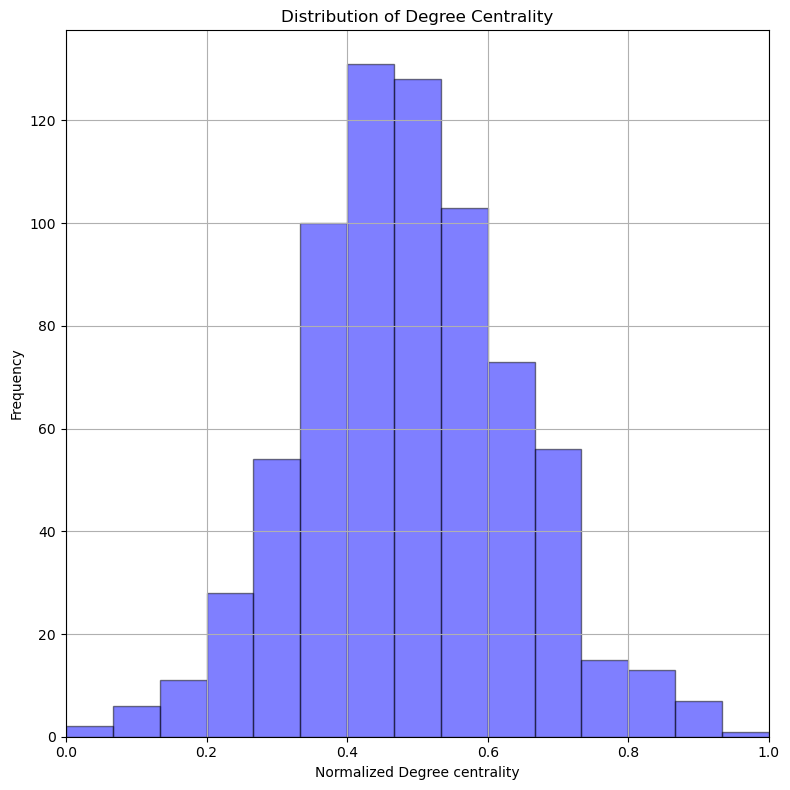

In [174]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_distribution(c, t, xl, yl):
    plt.figure(figsize=(8, 8))
    plt.hist(c, color='blue', bins=15, fill=True, alpha=0.5, edgecolor='black')
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.grid()
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

plot_distribution(node_scores, "Distribution of Degree Centrality", "Normalized Degree centrality", "Frequency")

728


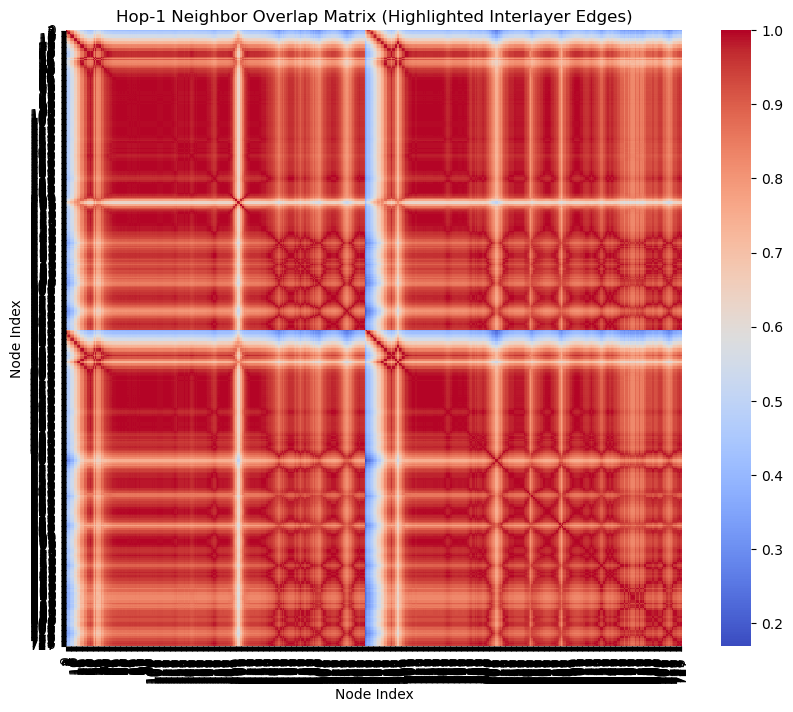

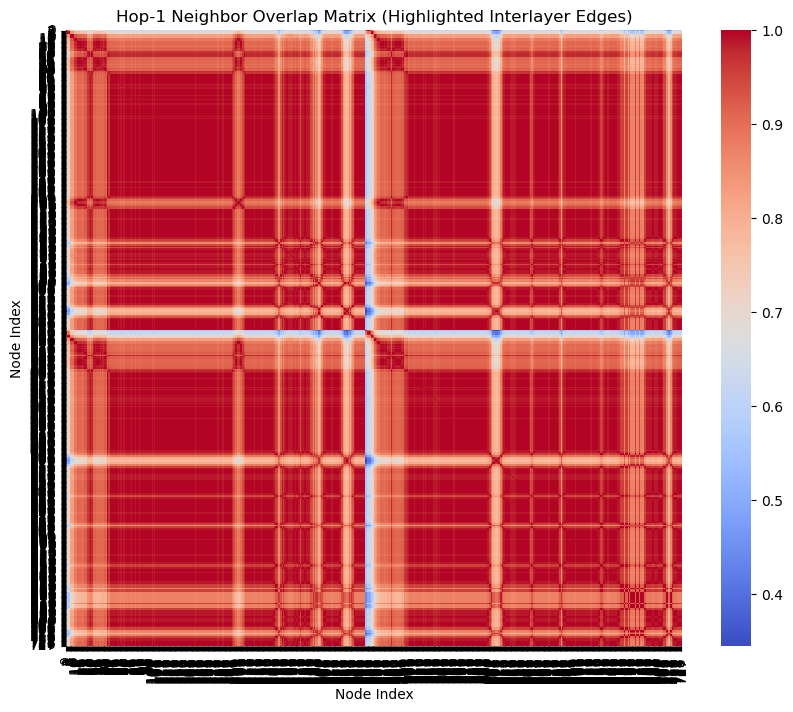

In [172]:
layer1 = [i for i in range(layers[0])]
layer2 = [i for i in range(layers[0],layers[0]+layers[1])]
l1g = g.subgraph(layer1)
l2g = g.subgraph(layer2)
# Extract all edges from the main graph
all_edges = set(g.edges())

g = g
print(len(list(g.nodes())))
# Extract edges from layer 1 and layer 2 subgraphs
l1_nodes = set(l1g.nodes())
l2_nodes = set(l2g.nodes())
nodes = list(g.nodes())
nodes.sort()

interlayer_edges = [(u, v) for u, v in g.edges() if (u in l1_nodes and v in l2_nodes) or (u in l2_nodes and v in l1_nodes)]
interlayer_nodes = set()
for u,v in interlayer_edges:
    interlayer_nodes.add(u)
    interlayer_nodes.add(v)
intralayer_nodes = set(nodes)-set(interlayer_nodes)

# def get_khop_neighbors(graph, node, k):
#     visited = {node}
#     current_level = {node}
#     intra_layer_neighbors = set()
#     inter_layer_neighbors = set()
#     for _ in range(k):
#         next_level = set()
#         for n in current_level:
#             for neighbor in graph.neighbors(n):
#                 if neighbor not in visited:
#                     next_level.add(neighbor)
#                     # Classify neighbor based on layer
#                     if neighbor in intralayer_nodes:
#                         intra_layer_neighbors.add(neighbor)
#                     else:
#                         inter_layer_neighbors.add(neighbor)
#         visited.update(next_level)
#         current_level = next_level

#     return intra_layer_neighbors, inter_layer_neighbors

# def get_khop_neighbors2(graph, node, k):
#     # Use BFS to find all neighbors up to k hops
#     visited = {node}
#     current_level = {node}
#     for _ in range(k):
#         next_level = set()
#         for n in current_level:
#             next_level.update(graph.neighbors(n))
#         next_level -= visited
#         visited.update(next_level)
#         current_level = next_level
#     return visited - {node}  # Exclude the original node

def compute_khop_jaccard_matrix(graph, k, intra=None):
    n = graph.number_of_nodes()
    nodes = list(graph.nodes)
    nodes.sort()
    # print(nodes)
    # node_index = {node: idx for idx, node in enumerate(nodes)}  # Mapping of nodes to indices
    # Step 1: Compute k-hop neighbors for all nodes
    khop_neighbors = {}
    for node in nodes:
        neighbors = nx.single_source_shortest_path_length(graph, node, cutoff=k)
        # print(neighbors)
        # for x in graph.neighbors(354): print(x)
        khop_neighbors[node] = set(neighbors.keys()) - {node}
        # print(khop_neighbors[node])
        # break
    # print(khop_neighbors)
    # Step 2: Initialize similarity matrix
    jaccard_matrix = np.zeros((n, n))
    # Step 3: Compute pairwise Jaccard similarity
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i <= j:  # Compute for upper triangular matrix
                nu, nv = khop_neighbors[u], khop_neighbors[v]
                if intra==1:
                    nu, nv = khop_neighbors[u]&intralayer_nodes, khop_neighbors[v]&intralayer_nodes
                elif intra==0:
                    nu, nv = khop_neighbors[u]&interlayer_nodes, khop_neighbors[v]&interlayer_nodes
                intersection = len(nu & nv)
                union = len(nu | nv)
                similarity = intersection / union if union > 0 else 0.0
                jaccard_matrix[i, j] = jaccard_matrix[j, i] = similarity
    # print(jaccard_matrix[:10])
    return jaccard_matrix

k = 16
# overlap_matrix = compute_khop_jaccard_matrix(g, k)
overlap_matrix = compute_khop_jaccard_matrix(g, k, intra=1)
overlap_matrix2 = compute_khop_jaccard_matrix(g, k, intra=0)

# overlap_matrix = np.zeros((len(nodes), len(nodes)))
# # overlap_matrix2 = np.zeros((len(nodes), len(nodes)))
# for i, node_i in enumerate(nodes):
#     for j, node_j in enumerate(nodes):
#         # n3_i_intra, n3_i_inter  = get_khop_neighbors(g, nodes[i], 3)
#         # n3_j_intra, n3_j_inter  = get_khop_neighbors(g, nodes[j], 3)
#         # intersection = len(n3_i_intra & n3_j_intra)
#         # union = len(n3_i_intra | n3_j_intra)
#         # overlap_matrix[i, j] = intersection / union if union > 0 else 0.0
#         # intersection = len(n3_i_inter & n3_j_inter)
#         # union = len(n3_i_inter | n3_j_inter)
#         # overlap_matrix2[i, j] = intersection / union if union > 0 else 0.0


#         n3_i = get_khop_neighbors2(g, nodes[i], 7)
#         n3_j = get_khop_neighbors2(g, nodes[j], 7)
#         intersection = len(n3_i & n3_j)
#         union = len(n3_i | n3_j)
#         overlap_matrix[i, j] = intersection / union if union > 0 else 0.0

plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(
    overlap_matrix,
    # annot=True,  # Annotate each cell with its value
    cmap="coolwarm",  # Color map
    cbar=True,  # Show the color bar
    xticklabels=nodes, 
    yticklabels=nodes,
    linewidths=0,  # Add grid lines between cells
    linecolor="black",  # Color of grid lines
    square=True,  # Make cells square
    vmin=np.min(overlap_matrix),  # Adjust color scale
    vmax=np.max(overlap_matrix)
)
plt.title("Hop-1 Neighbor Overlap Matrix (Highlighted Interlayer Edges)")
plt.xlabel("Node Index")
plt.ylabel("Node Index")
plt.show()

plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(
    overlap_matrix2,
    # annot=True,  # Annotate each cell with its value
    cmap="coolwarm",  # Color map
    cbar=True,  # Show the color bar
    xticklabels=nodes, 
    yticklabels=nodes,
    linewidths=0,  # Add grid lines between cells
    linecolor="black",  # Color of grid lines
    square=True,  # Make cells square
    vmin=np.min(overlap_matrix2),  # Adjust color scale
    vmax=np.max(overlap_matrix2)
)
plt.title("Hop-1 Neighbor Overlap Matrix (Highlighted Interlayer Edges)")
plt.xlabel("Node Index")
plt.ylabel("Node Index")
plt.show()

# np.save("overall31_16", overlap_matrix)
np.save("intra21_16", overlap_matrix)
np.save("inter22_16", overlap_matrix2)
# np.save("intra11_16", overlap_matrix)
# np.save("intra12_16", overlap_matrix)